Clustering
$1.\text{What is clustering?}$

It refers to an algorithm that appropriately clusters a given data.<br>
By analyzing and understanding the data values within a new cluster, we can give this group new meaning and look at the entire data from various angles.<br>


$2.\text{K-means clustering}$<br>

Let's find out about K-means as a representative type of clustering model.<br>
To simply define it, it can be intuitively understood as "Let's cluster data around K average values!"<br>
Then, how should we determine the most appropriate K value? That's when our work comes up. It's to find the best "K"<br>
![title](./photo/Kmens.png)<br>

$2-1. \text{K-means algorithm}$
There is an algorithm used to find the optimal K value. The algorithm proceeds iteratively in the following four steps and finds the optimal K value.



1.An arbitrary K value is set as the initial value and K cluster centers are selected.

2.Calculate each data and what the distance is from each K center and select the nearest center.

3.Update cluster center again.

4.Repeat steps 2 and 3 until the cluster of allocated data does not change before and after updating the cluster center.


In [44]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import sys
from pathlib import Path
sys.path.insert(0, str(Path(r'D:\OneDrive\Documents\SJTU 과제\기계학습(머신러닝)\Machine_Learning\MyPackage\CHAE_ML.py').resolve().parent.parent))
#from MyPackage import CHAE_ML
df = pd.read_csv('./iris.data')
df.reset_index(drop=True, inplace=True)
#df.info()
m, n = df.shape
print('Number of training examples m = ', m)
print('Number of features n = ', n - 1)
df.head()

Number of training examples m =  150
Number of features n =  4


,sepal.lenth,sepal.width,petal.lenth,petal.width,type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


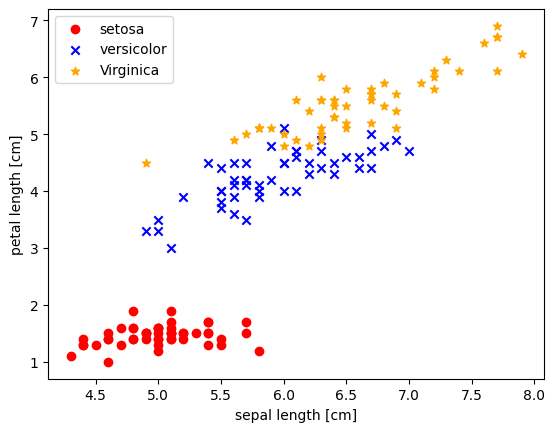

In [45]:
y = df.iloc[0:150, 4].values
#y = np.where(y == '0', -1, 1)
# 꽃받침 길이와 꽃잎 길이를 추출합니다
x = df.iloc[:, [0, 2]].values
#print(x)
#print(y)
# 산점도를 그립니다, setosa-음성, versicolor-양성
plt.scatter(x[:50, 0], x[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(x[50:100, 0], x[50:100, 1],
            color='blue', marker='x', label='versicolor')
plt.scatter(x[100:, 0], x[100:, 1],
            color='orange', marker='*', label='Virginica')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

First, I brought the basic data variance.<br>
it can be said that the core of the K-means++ algorithm is to be able to estimate the dataset that resembles this data the most.

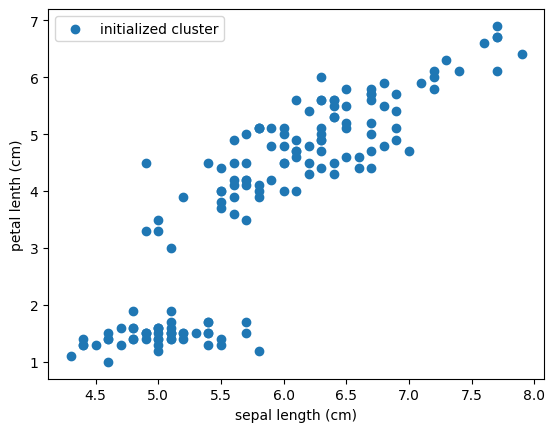

In [46]:
# x1 = df.iloc[:, 0].values
# y1 = df.iloc[:, 2].values
sepal_len = x[:,0]
petal_len = x[:,1]
plt.scatter(sepal_len, petal_len,label='initialized cluster')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal lenth (cm)')
plt.legend(loc='upper left')
plt.show()

STEP 1: Specify K random Centroids<br>
First, let's randomly designate K centroids. Since there are three species, let's set K to 3.

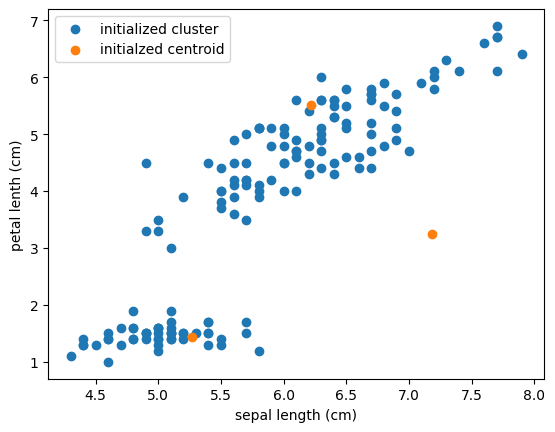

In [47]:
k=3

centroids_x = np.random.uniform(min(sepal_len), max(sepal_len), k)
centroids_y = np.random.uniform(min(petal_len), max(petal_len), k)
centroids = np.array(list(zip(centroids_x, centroids_y)))

plt.scatter(sepal_len, petal_len,label='initialized cluster')	# 데이터들은 파란색으로 표시되고
plt.scatter(centroids_x, centroids_y,label='initialzed centroid')	# centroids는 주황색으로 표시됩니다
plt.xlabel('sepal length (cm)')
plt.ylabel('petal lenth (cm)')
plt.legend(loc='upper left')
plt.show()

STEP 2: Assign Datas to Nearest Centroid
Let's designate Centroids and now assign data close to those centroids.<br>
calculate Euclidean distance by considering each data as a vector to calculate quantitatively what is 'close'.<br>

Euclidian distance<br>
$d(a,b) = \sqrt{(a_1 - b_1)^2 + (a_2 - b_2)^2 + \cdots + (a_n - b_n)^2}$

In [48]:
def distance(a, b):
    #sum([np.sqrt((ed_a - ed_b)**2) for ed_a, ed_b in list(zip(a, b))])
    return np.sqrt(np.sum((a - b)**2))
     

In [49]:
""" 
logic
1.take every dataset of iris data
2.take features from dataset (x,y)
3.compare euclidian distance (x,y) and cluster k1,k2,..kn
4.find minimum index of datasets
5.add minimum index to label
"""
# 각 데이터 포인트를 그룹화 할 labels을 생성합니다 (0, 1, 또는 2)
def clustering(data,centroid,K):
  labels = np.zeros(len(data))
  features = np.array(list(zip(data[:,0], data[:,1])))#septal, petal lenth
  # 각 데이터를 순회하면서 centroids와의 거리를 측정합니다
  for i in range(len(data)):
    distances = np.zeros(K)	# 초기 거리는 모두 0으로 초기화 해줍니다
    for j in range(K):
      distances[j] = distance(features[i], centroid[j])
    cluster = np.argmin(distances)	# np.argmin은 가장 작은 값의 index를 반환합니다
    labels[i] = cluster
  return labels

Check clustering results:<br>
We can view the clustering results. Let me draw a scatterplot based on these results.

coordinate of centroid: [5.27134538 7.18740869 6.21595019] [1.43643642 3.24760435 5.51240978]


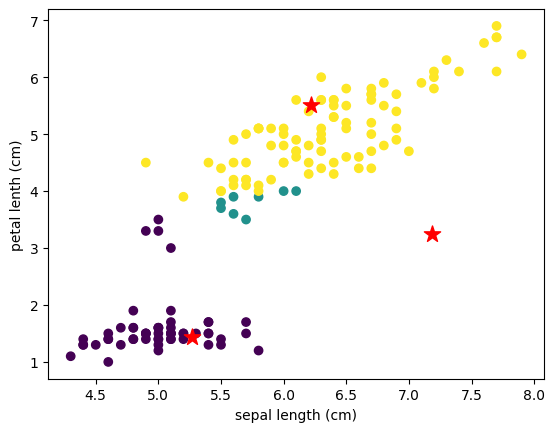

In [50]:
clust_result = clustering(x,centroids,k)
plt.scatter(sepal_len, petal_len, c=clust_result )
plt.scatter(centroids_x, centroids_y, c='red',marker="*",s=150,label='centorids')	# centroid는 빨간색으로 나타냅니다
print("coordinate of centroid:", centroids_x, centroids_y)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal lenth (cm)')
plt.show()

It seems not a good result because the starting centroids are random.<br>
Let's update the controls and see what happens.<br>

In [51]:
from copy import deepcopy
centroids_old = deepcopy(np.array(centroids))
print(type(centroids_old))
print(centroids_old)
def centroid_update(data,clusters,K):
  features = np.array(list(zip(data[:,0], data[:,1])))#septal, petal lenth
  centroids_updated=[]
  for i in range(K):
    # 각 그룹에 속한 데이터들만 골라 points에 저장합니다
    points = [ features[j] for j in range(len(features)) if clusters[j] == i ]
    #print(points)
    # points의 각 feature, 즉 각 좌표의 평균 지점을 centroid로 지정합니다
    centroids_updated.append(np.mean(points, axis=0))
  return centroids_updated 

<class 'numpy.ndarray'>
[[5.27134538 1.43643642]
 [7.18740869 3.24760435]
 [6.21595019 5.51240978]]


updated centroids:  [[5.00555556 1.59814815]
 [5.725      3.8       ]
 [6.36818182 5.08068182]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 0. 2. 1. 2. 1. 2. 2. 2. 2. 1. 2. 1.
 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2.
 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2.]
[[5.27134538 1.43643642]
 [7.18740869 3.24760435]
 [6.21595019 5.51240978]]


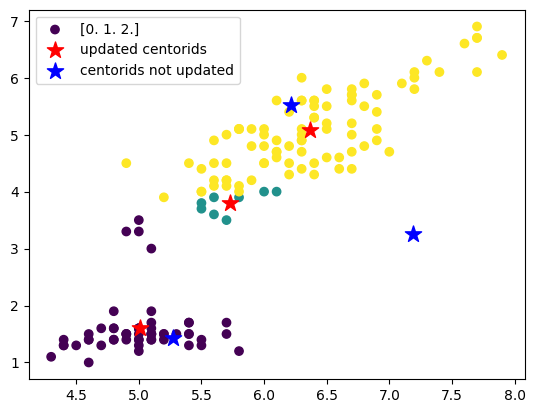

In [52]:
centroids_updated = (centroid_update(x,clust_result,k))
print("updated centroids: ",np.array(centroids_updated))
print(clust_result)
print(centroids_old)
unique_values = np.unique(clust_result)
centroids_updated =np.array(centroids_updated)
plt.scatter(sepal_len, petal_len, c=clust_result,label=unique_values)
plt.scatter(centroids_updated[:,0],centroids_updated[:,1], c='red',marker="*",s=150,label='updated centorids')
plt.scatter(centroids_old[:,0],centroids_old[:,1], c='b',marker="*",s=150,label='centorids not updated')

plt.legend(loc='upper left')
plt.show()

We find the center point and we plot it again, and we see that it's very similar to the existing data set.<br>
Now, let's update the dataset and find optimized centroids.

In [53]:
def Kmeans_plus(data,centroids,K):
  centroids_old = np.zeros(np.array(centroids).shape)	# 제일 처음 centroids_old는 0으로 초기화 해줍니다
  centroids_updated = deepcopy(centroids)
  labels = np.zeros(len(data))
  print("K=",K)
  error = np.zeros(K)
  # error 도 초기화 해줍니다
  for i in range(K):
    error[i] = distance(centroids_old[i], centroids_updated[i]) #centroid old랑 centrod i를 업데이트 
  # STEP 4: error가 0에 수렴할 때 까지 2 ~ 3 단계를 반복합니다
  while(error.all() != 0):
    # STEP 2: 가까운 centroids에 데이터를 할당합니다
    labels = clustering(data,centroids_updated,K)
    # Step 3: centroids를 업데이트 시켜줍니다
    centroids_old = deepcopy(centroids_updated)
    centroids_updated = centroid_update(data,labels,K)
    # 새롭게 centroids를 업데이트 했으니 error를 다시 계산합니다
    for i in range(K):
      error[i] = distance(centroids_old[i], centroids_updated[i])
    #print(error)
  return centroids_updated,labels,error

K= 3
[array([5.006, 1.464]), array([5.64571429, 4.06571429]), array([6.59384615, 5.35846154])]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 2. 2. 2. 1. 2. 1. 2. 1. 2. 1. 1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 2. 1.
 2. 2. 1. 2. 2. 2. 1. 1. 1. 1. 1. 2. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2.]
[0.         0.13001082 0.08319726]


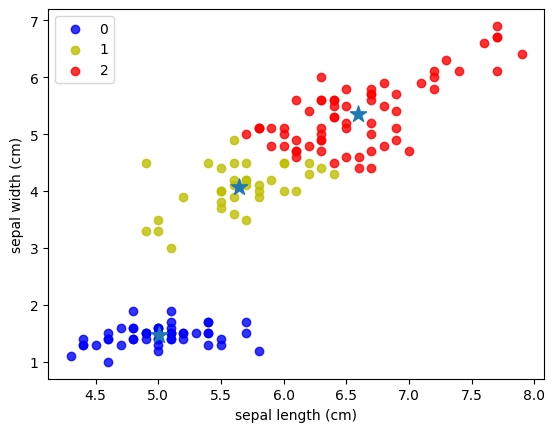

In [54]:
cent_up , labels,error = Kmeans_plus(x,centroids_updated,k)
print(cent_up)
print(labels)
print(error)
colors = ['b', 'y', 'r']
cent_up = np.array(cent_up)
for i in range(k):
    points = np.array([x[j] for j in range(len(x)) if labels[j] == i])
    plt.scatter(points[:, 0], points[:, 1], alpha=0.8,c=colors[i],label=str(i))

plt.scatter(cent_up[:, 0], cent_up[:, 1], marker='*', s=150)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend(loc='upper left')

plt.show()

![title](./photo/kmeans_origin.png)<br>
actual data scatter plot


In [55]:
print(labels)
#reverse_labels = reversed(labels)
print(np.array(df.iloc[:,-1]))
valid = pd.DataFrame({'labels': labels,'type': np.array(df.iloc[:,-1])})
#print(df.iloc[:,-1])
ct = pd.crosstab(valid['labels'], valid['type'])
print(ct)

#0 Virginica 1 versicolor 2 setosa

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 2. 2. 2. 1. 2. 1. 2. 1. 2. 1. 1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 2. 1.
 2. 2. 1. 2. 2. 2. 1. 1. 1. 1. 1. 2. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2.]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
type     0   1   2
labels            
0.0     50   0   0
1.0      0  33   2
2.0      0  17  48



$2-2. \text{Set optimal cluster count (K value)}$<br>
In order to set the initial value, the method varies according to the 'viewpoint', and the following methods exist.

Hierarchical Clustering: Layering from bottom to bottom in a bottom-up manner.

WCSS (Elbow-method): Evaluate appropriateness among several candidate k values and select an appropriate initial value. At this time, a scale for evaluating appropriateness is selected from various methods, such as calculating a distance from a cluster center, for example.
This method sets the optimal initial value of k while performing it one by one like Grid-search.<br>
WCSS= ∑Pi in Cluster1 distance (Pi C1)2 +∑Pi in Cluster2distance (Pi C2)2+∑Pi in CLuster3 distance (Pi C3)2

Information Criterion Approach: For clustering models, the likelihood is calculated as a score. In the case of K-means, the likeihood is calculated using the Gaussian Mixure model.

Rule of thumb: Follow a simple formula. The formula is the picture at the bottom. where n is the number of data.<br>
$k=\sqrt{n/2}$

In [56]:

def wcss(cent_up,data,K):
  centroids_x = np.random.uniform(min(sepal_len), max(sepal_len), K)
  centroids_y = np.random.uniform(min(petal_len), max(petal_len), K)
  centroids = np.array(list(zip(centroids_x, centroids_y)))
  #print(centroids)

  labels = np.zeros(len(data))
  features = np.array(list(zip(data[:,0], data[:,1])))#septal, petal lenth
  wcss=0
# Measure the distance to the centroids while traveling through each data
  for i in range(len(data)):
    distances = np.zeros(K)	# initialize the start distance to zero
    for j in range(K):
      distances[j] = distance(features[i], cent_up[j])
    #print(distances)
    min_dist = np.min(distances)	# return the smallest distance
    #print(min_dist)
    wcss += min_dist
  return wcss
  


K= 1
K= 2
K= 3


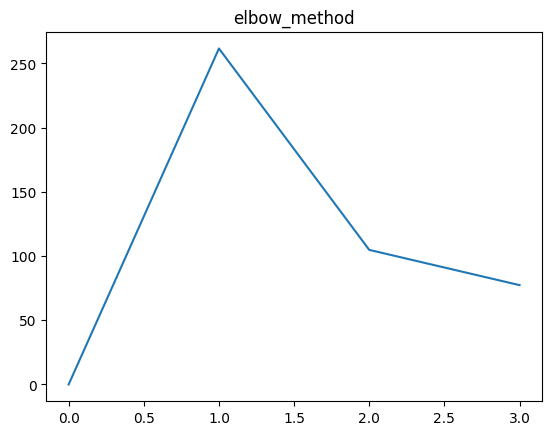

In [57]:
elbow = np.zeros(4)
for i in range(1,4):
    cent_up ,new_labels,error = Kmeans_plus(x,centroids,i)
    MY_wcss = wcss(cent_up,x,i)
    elbow[i]=MY_wcss
x_valeus = [i for i in range(0,4)]
y_values = elbow
plt.plot(x_valeus,y_values)
plt.title("elbow_method")
plt.show()

I think I can draw a neat graph if I adjust the k value more freely by making it a class.<BR>
The value fluctuated according to the classification of the initial K value.<br>
Originally, I wanted to make it using all the datasets,<br>
but it was too difficult to implement it in multiple dimensions. I think we need to study this a little more.<br>
I think we can check if better clustering is possible by applying knn here.